# Predict the Winner of Thoroughbred Horse Racing 


> ## Horse racing is an equestrian sport. The first racetrack was constructed on Long Island in 1665. It is the oldest Thoroughbred race in North America.

>|           | ** Parimutuel betting ** |
>| --------- |:--------------------:|
>| **Win**   | a horse finishes first |
>| **Place** | a horse finishes either first or second |
>| **Show**  | a horse finishes first, second or third |



>## Setup
>---
>* ### date and place: May 25, 2015 at Monmouth Park Racetrack
>* ### data munging: could not find a Python 3.x library to work with PDF. Instead I used the free online converter [smallpdf](http://smallpdf.com) to generate Excel files. 
>* ### first dataset: subset of full chart extracted from Equibase horse racing data
>* ### second dataset: horse racing result of the day
>* ### sample data from the original PDF:
>![alt text](https://github.com/tc-general-assembly/Assignment1/raw/master/mth_20150525_sample.png "Sample PDF")



># Questions
> ---
>1. ### what are the top 10% rated horses by Class Rating?
>2. ###  what is the distribution of winning (Win/Place/Show) by Class Rating?
>3. ### handicapping - what is the potential payout if we pick the top horse of each race by Last Pace and Last Speed Figure?

># Know the data

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline

In [2]:
# (1) load past performance data
#data_pp = pd.read_excel("/Users/tommiechen/Downloads/_poc/HorseRacing/20150525_Monmouth_Horse2.xlsx")
#data_pp = pd.read_excel("\\UserTemp\\tchen_new\\Profession\\POC\\Horse\\20150525_Monmouth_Horse2.xlsx")
data_pp = pd.read_excel('20150525_Monmouth_Horse2.xlsx')

data_pp.head(7)

#data_pp.info()
#data_pp.describe()
#data_pp['Average Last 3 Pace'].value_counts()

,Monmouth Race No,Race Rating,Post Time,Pgm,Post Pos,win%,Horse,Class Rating,Last Pace,Average Last 3 Pace,Highest Lifetime Pace,Last Speed Figure,Average Last 3 Speed Figure,Highest Lifetime Speed Figure
0,1,92,0.534722,1,1,(14%),Laghubaar,86,33,73,114,89,89,97
1,1,92,0.534722,2,2,(14%),J's Buck Shot Bang,67,66,75,105,72,71,78
2,1,92,0.534722,3,3,(14%),It's Charlie Again,76,96,72,114,86,80,96
3,1,92,0.534722,4,4,(14%),Empower,80,101,86,120,88,86,96
4,1,92,0.534722,5,5,(13%),Farmer Jones,88,68,61,110,80,86,108
5,1,92,0.534722,6,6,(12%),Delta Golf Alpha,75,72,72,109,81,80,90
6,2,93,0.552083,1,1,(12%),Lure of the South,84,66,68,112,83,87,99


In [3]:
# (2) load horse racing result
#data_result = pd.read_excel("/Users/tommiechen/Downloads/_poc/HorseRacing/20150525_Monmouth_Result.xlsx")
#data_result = pd.read_excel("\\UserTemp\\tchen_new\\Profession\\POC\\Horse\\20150525_Monmouth_Result.xlsx")
data_result = pd.read_excel('20150525_Monmouth_Result.xlsx')
data_result.head(6)

,Date,Track,Race,Pgm,Horse,Jockey,Win,Place,Show
0,2015-05-25,Monmouth Park,1,4,NaN,NaN,8.8,4.8,3.2
1,2015-05-25,Monmouth Park,1,3,NaN,NaN,NaN,8.2,4.8
2,2015-05-25,Monmouth Park,1,2,NaN,NaN,NaN,NaN,5.6
3,2015-05-25,Monmouth Park,2,6,NaN,NaN,6.0,3.4,2.8
4,2015-05-25,Monmouth Park,2,1,NaN,NaN,NaN,6.0,4.6
5,2015-05-25,Monmouth Park,2,7,NaN,NaN,NaN,NaN,3.2


In [4]:
# (3) merge past performance with current result tables
data_table = pd.merge(data_pp, data_result, 
                      left_on=['Monmouth Race No','Pgm'], 
                      right_on=['Race','Pgm'], 
                      how='left', 
                      suffixes=['_pp', '_result'])

data_table.head()

,Monmouth Race No,Race Rating,Post Time,Pgm,Post Pos,win%,Horse_pp,Class Rating,Last Pace,Average Last 3 Pace,...,Average Last 3 Speed Figure,Highest Lifetime Speed Figure,Date,Track,Race,Horse_result,Jockey,Win,Place,Show
0,1,92,0.534722,1,1,(14%),Laghubaar,86,33,73,...,89,97,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,92,0.534722,2,2,(14%),J's Buck Shot Bang,67,66,75,...,71,78,2015-05-25,Monmouth Park,1,NaN,NaN,NaN,NaN,5.6
2,1,92,0.534722,3,3,(14%),It's Charlie Again,76,96,72,...,80,96,2015-05-25,Monmouth Park,1,NaN,NaN,NaN,8.2,4.8
3,1,92,0.534722,4,4,(14%),Empower,80,101,86,...,86,96,2015-05-25,Monmouth Park,1,NaN,NaN,8.8,4.8,3.2
4,1,92,0.534722,5,5,(13%),Farmer Jones,88,68,61,...,86,108,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


># Q1: what are the top 10% horses by Class Rating? 
>### **_Class Rating_** measures a horse's actual performance in a race - the higher the number, the better the performance
>

In [5]:
total_pp = data_pp['Class Rating'].count() * 0.10
data_pp[['Horse','Class Rating']].sort(['Class Rating'], ascending=False).head(int(total_pp.round()))

,Horse,Class Rating
92,Nellie Cashman,102
94,Cushion (GB),102
68,Lasso,101
91,Kenzadargent (FR),99
76,Marriage Fever,99
65,Tune Me In,97
72,Hothersal,97
96,Joy,96
63,Yari,96
95,Tokyo Time,96


># Q2: what is the distribution of winning (Win/Place/Show) by Class Rating?
>

In [6]:
data_table[['Class Rating','Win','Place','Show']].groupby('Class Rating').count().sum()

Win      10
Place    20
Show     32
dtype: int64

In [7]:
win_distribution = data_table[['Class Rating','Win','Place','Show']].groupby('Class Rating').count()
#data_table[['Class Rating','Win','Place','Show']].groupby('Class Rating').agg({'Win':pd.Series.count, 'Place':pd.Series.count, 'Show':pd.Series.count})
win_distribution.reset_index(inplace=True)
win_distribution['Total Wins'] = win_distribution['Win'] + win_distribution['Place'] + win_distribution['Show']
win_distribution.tail(10)

,Class Rating,Win,Place,Show,Total Wins
39,90,1,2,2,5
40,91,0,0,1,1
41,92,0,1,1,2
42,93,0,0,0,0
43,94,0,1,1,2
44,96,0,0,0,0
45,97,1,1,2,4
46,99,1,1,1,3
47,101,0,0,0,0
48,102,0,0,0,0


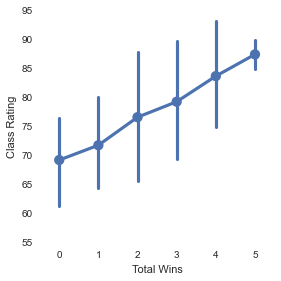

In [46]:
# ********** factorplot **********
win_distribution = win_distribution.sort('Total Wins', ascending=True)
sb.factorplot('Total Wins', 'Class Rating', data=win_distribution, kind='point')

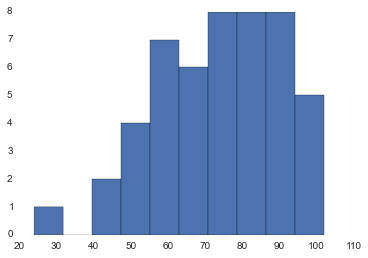

In [14]:
# ********** hist, boxplot **********
# the majority of class rating is between 70 and 90 for this race
win_distribution['Class Rating'].hist() 


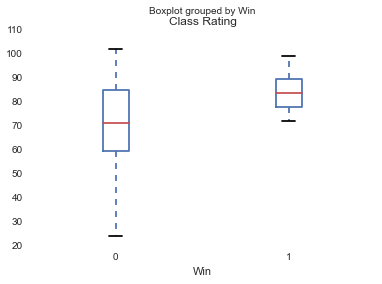

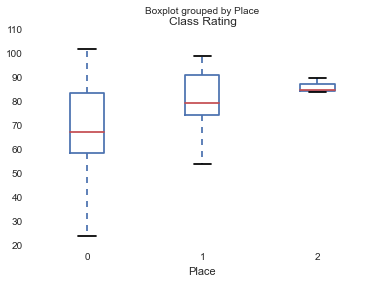

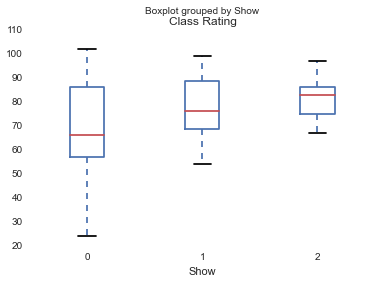

In [13]:
# 0: did not win the game, 1 and above: did win the game
win_distribution.boxplot('Class Rating','Win')   # to pick Win: choose the class rating above 85
win_distribution.boxplot('Class Rating','Place') # to pick Place: choose the class rating above 80
win_distribution.boxplot('Class Rating','Show')  # to pick Show: choose the class rating above 77

># Q3: handicapping - what is the potential payout if we pick the top horse of each race by Last Pace and Last Speed Figure Combined?
>### **_Pace_** rating measures how fast a horse ran up to a specific point of call in a race - the higher the number, the faster the horse ran.
>### **_Speed Figure_** tells you how fast a horse has been running in its past races. The number is calculated by multiple factors such as classes of horse races, track conditions, horse's running time and so on.

In [10]:
data_table['Last Pace'].fillna(0, inplace=True) # replace NaN with 0 for current data frame
data_table['Last Speed Figure'].fillna(0, inplace=True) # replace NaN with 0 for current data frame
data_table['Top Speed'] = data_table['Last Pace'] + data_table['Last Speed Figure'] 

top_speed_group = data_table[['Monmouth Race No','Pgm','Top Speed','Win','Place','Show']]
grouped = top_speed_group.groupby('Monmouth Race No').agg({'Top Speed': np.max})
grouped.reset_index(inplace=True)

final_result = pd.merge(top_speed_group, grouped, 
                        left_on=['Monmouth Race No','Top Speed'], 
                        right_on=['Monmouth Race No','Top Speed'], 
                        how='inner')
final_result.fillna(0, inplace=True)
final_result.sort(['Win','Place','Show'], ascending=[False,False,False])
#final_result.sum(axis=0) # column sum


#********** for reference **********
#grouped = data_pp.groupby('Monmouth Race No')
#functions = ['count', 'min', 'max', 'mean', 'std']
#result = grouped['Last Pace', 'Last Speed Figure'].agg(functions)
#result
#data_pp[['Last Pace', 'Last Speed Figure']].describe()

#********** for reference **********
#k1 = data.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
#k1 = data[['Time', 'Product']].query('Product == p_id and start_time <= Time < end_time')

,Monmouth Race No,Pgm,Top Speed,Win,Place,Show
0,1,4,189,8.8,4.8,3.2
5,6,4,187,6.2,3.2,2.8
8,9,5,195,4.8,2.6,2.4
2,3,3,166,2.8,2.2,2.1
3,4,4,182,0.0,3.2,2.6
4,5,6,150,0.0,0.0,4.8
7,8,3,214,0.0,0.0,4.8
1,2,5,187,0.0,0.0,0.0
6,7,5,175,0.0,0.0,0.0
9,10,6,205,0.0,0.0,0.0


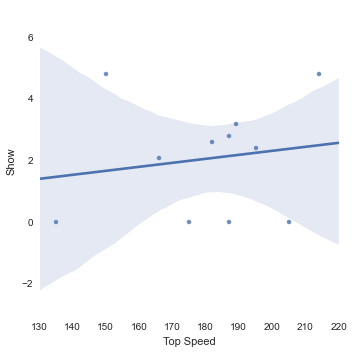

In [11]:
sb.lmplot(x = 'Top Speed', y='Show', data=final_result)